In [10]:
# 导包，导数据
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
db = pd.read_excel(r"D:\论文\垃圾焚烧飞灰基地聚物\database 28d UCS_2.xlsx")
db

,钙硅比,钙铝比,硅铝比,硫,氯,掺量,模数,碱当量 (%),尺寸,龄期,砂率,水灰比,UCS
0,3.715089,2.795926,0.752587,0.9520,1.952,0.1,0.00,0.0,40.0,3,3,0.7,5.3
1,3.451969,2.527696,0.732248,0.4850,0.312,0.0,0.00,0.0,40.0,7,3,0.7,8.1
2,3.451969,2.527696,0.732248,0.4850,0.312,0.0,0.00,0.0,40.0,28,3,0.7,10.1
3,3.451969,2.527696,0.732248,0.4850,0.312,0.0,0.00,0.0,40.0,56,3,0.7,10.3
4,3.257298,2.527177,0.775851,1.3540,3.514,0.2,0.00,0.0,40.0,3,3,0.7,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1.723743,4.503547,2.612656,6.1194,15.400,0.7,1.72,10.0,20.0,56,0,0.7,23.8
537,2.480290,4.503547,1.815734,6.1194,15.400,0.7,1.72,10.0,20.0,28,0,0.7,19.0
538,2.480290,4.503547,1.815734,6.1194,15.400,0.7,1.72,10.0,20.0,3,0,0.7,12.5
539,2.480290,4.503547,1.815734,6.1194,15.400,0.7,1.72,10.0,20.0,7,0,0.7,12.8


# 打乱数据集

In [11]:
#先打乱数据集的顺序
#数据的排列顺序会影响交叉验证的结果
randomed_db = db.sample(frac=1, random_state=42).reset_index(drop=True)  

randomed_db

,钙硅比,钙铝比,硅铝比,硫,氯,掺量,模数,碱当量 (%),尺寸,龄期,砂率,水灰比,UCS
0,0.573329,4.218517,7.357928,2.545,0.534,0.025,1.45,6.1500,50.0,7,0,0.555,3.98
1,0.871804,5.045604,5.787546,3.078,9.812,0.300,0.00,0.0496,40.0,7,0,0.400,1.64
2,21.344340,125.694444,5.888889,8.550,21.480,1.000,1.72,9.0000,20.0,28,0,0.700,9.70
3,10.647482,45.773196,4.298969,6.580,23.700,1.000,1.16,0.0900,5.0,3,0,0.650,1.50
4,15.402715,94.555556,6.138889,6.860,27.350,1.000,1.70,10.0000,20.0,28,0,0.670,13.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,11.907692,16.753247,1.406926,4.590,27.060,1.000,2.00,0.1950,40.0,7,0,1.500,2.70
537,4.551116,8.269963,1.817129,5.922,21.330,0.900,1.16,0.0700,5.0,14,0,0.650,7.99
538,0.093357,0.110106,1.179407,1.344,4.020,0.150,0.94,7.2000,40.0,7,0,0.378,6.06
539,2.619290,14.262890,5.445326,3.542,10.434,0.600,1.16,10.0000,20.0,60,0,0.700,16.10


In [12]:
# 划分特征与目标
x = randomed_db.drop("UCS",axis=1)  #对于DataFrame类型的数据集，使用drop函数删去 目标列 ，得到特征列
y = randomed_db["UCS"]              #直接指明目标列是哪列

# 设置出图字体为微软雅黑（兼容中英文）

In [22]:
import matplotlib.pyplot as plt  

plt.rcParams['font.family'] = 'SimHei'  # 指定中文字体  
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题  

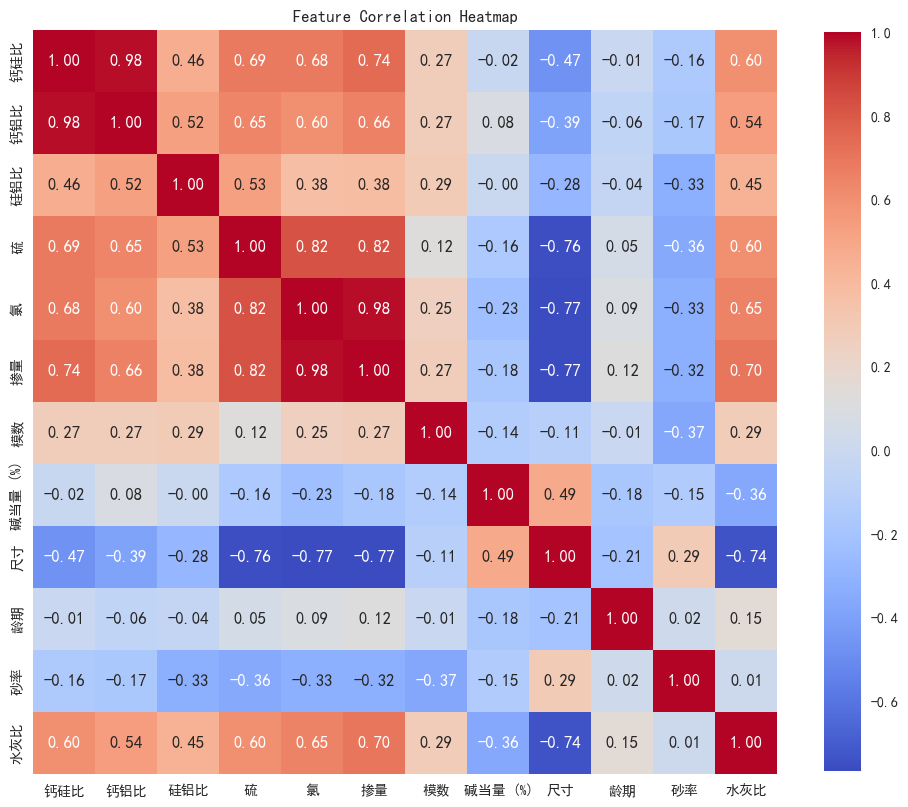

In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt
# 计算相关系数矩阵  
corr = x.corr()  

# 设置绘图大小  
plt.figure(figsize=(12, 12))  

# 使用 Seaborn 绘制热力图  
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})  

# 设置标题  
plt.title('Feature Correlation Heatmap')  

# 显示图形  
plt.show() 

## 初步筛选模型

In [7]:
import pandas as pd  
from pycaret.regression import *  

# 创建一个新的 DataFrame，将 X 和 y 合并  
data = pd.concat([x, y], axis=1)  

# 设置 PyCaret 环境  
# 假设目标列的名称是 'target'，您需要替换为实际的目标列名称  
exp_reg = setup(data=data, target='UCS', session_id=123)  

# 比较所有模型并获取最佳模型  
best_models = compare_models()  

# 显示结果  
print(best_models)

,Description,Value
0,Session id,123
1,Target,UCS
2,Target type,Regression
3,Original data shape,"(541, 13)"
4,Transformed data shape,"(541, 13)"
5,Transformed train set shape,"(378, 13)"
6,Transformed test set shape,"(163, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1.1665,3.2190,1.7651,0.9304,0.2320,0.1963,0.0580
catboost,CatBoost Regressor,1.2148,3.2943,1.7832,0.9296,0.2260,0.2036,0.2810
et,Extra Trees Regressor,1.3692,4.2504,2.0487,0.9104,0.2601,0.2388,0.0210
rf,Random Forest Regressor,1.5504,5.0228,2.2253,0.8956,0.2785,0.2744,0.0280
gbr,Gradient Boosting Regressor,1.7495,5.6936,2.3681,0.8806,0.3193,0.3194,0.0130
lightgbm,Light Gradient Boosting Machine,1.6976,6.2349,2.4359,0.8705,0.3008,0.2949,0.0260
dt,Decision Tree Regressor,1.8475,7.8874,2.7847,0.8351,0.3537,0.3122,0.0050
ada,AdaBoost Regressor,2.9719,13.2521,3.6204,0.7172,0.5394,0.8254,0.0110
knn,K Neighbors Regressor,3.1657,20.0978,4.4104,0.5518,0.5198,0.6193,0.0070
ridge,Ridge Regression,3.8698,29.2758,5.3445,0.4104,0.6034,0.8099,0.0050


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)


# 1.初步测试

In [8]:
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import r2_score  
import numpy as np

#随机森林
from sklearn.ensemble import RandomForestRegressor 
RFR = RandomForestRegressor(n_estimators=160     #实例化
                           ,random_state=15
                            )
scores = cross_val_score(RFR, x, y, cv=5)       #交叉验证
print("随机森林每折的得分：", scores)  
print("随机森林平均得分：", np.mean(scores)) 




#XGBoost
from xgboost import XGBRegressor   
XGBR = XGBRegressor(  
    n_estimators=500,   
    learning_rate=0.1,  
    max_depth=3,  
    subsample=0.8,  
    random_state=5,   
)  
# 执行交叉验证  
scores = cross_val_score(XGBR, x, y, cv=5)  
# 输出每折得分与平均得分  
print("XGB每折的得分：", scores)  
print("XGB平均得分：", np.mean(scores))  




#CatBoost
from catboost import CatBoostRegressor  
catboost_regressor = CatBoostRegressor(  
    iterations=500,        # 迭代次数  
    learning_rate=0.1,     # 学习率  
    depth=6,               # 树的深度  
    loss_function='RMSE',  # 损失函数为均方根误差  
    eval_metric='R2',      # 评估指标  
    verbose=100,           # 每100轮输出一次日志  
    random_seed=42         # 随机种子  
)  
# 执行交叉验证，设置 scoring 为 'r2' 来计算 R²  
scores = cross_val_score(catboost_regressor, x, y, cv=11, scoring='r2')  
# 输出每折得分与平均得分  
print("CATB每折的得分（R²）：", scores)  # 直接输出 R² 值  
print("CATB平均得分（R²）：", np.mean(scores))  # 计算平均 R² 值  




#KNN
from sklearn.neighbors import KNeighborsRegressor  
KNNR = KNeighborsRegressor(  
    n_neighbors=5,         # 邻居数量  
    weights='distance',    # 根据距离加权  
    algorithm='auto',      # 自动选择算法  
    leaf_size=30,          # 指定叶子节点的大小  
    p=2                    # 使用欧氏距离  
)  
# 执行交叉验证  
scores = cross_val_score(KNNR, x, y, cv=5)  
# 输出每折得分与平均得分  
print("KNN每折的得分：", scores)  
print("KNN平均得分：", np.mean(scores))  




# Extra Trees
from sklearn.ensemble import ExtraTreesRegressor  
ETR = ExtraTreesRegressor(  
    n_estimators=118,   # 替换为n_estimators  
    max_depth=3,        # 使用max_depth控制树的深度  
    min_samples_split=2, # 控制节点的最小样本划分数  
    min_samples_leaf=1,  # 叶节点的最小样本数量  
    random_state=5,      # 随机种子  
)  
# 执行交叉验证  
scores = cross_val_score(ETR, x, y, cv=5)  
# 输出每折得分与平均得分  
print("ET每折的得分：", scores)  
print("ET平均得分：", np.mean(scores))  




#ANN
import numpy as np  
import pandas as pd  
import torch  
import torch.nn as nn  
import torch.optim as optim  
from sklearn.model_selection import KFold  
from sklearn.metrics import r2_score  
from sklearn.preprocessing import StandardScaler  
# 转换 x 和 y 为 Numpy 数组  
x = np.array(x)  
y = np.array(y)  
# 数据标准化  
scaler = StandardScaler()  
x = scaler.fit_transform(x)  

class SimpleNN(nn.Module):  
    def __init__(self, input_dim):  
        super(SimpleNN, self).__init__()  
        self.fc1 = nn.Linear(input_dim, 64)  
        self.fc2 = nn.Linear(64, 128)  # 增加神经元数量  
        self.fc3 = nn.Linear(128, 1)  

    def forward(self, x):  
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x  

kf = KFold(n_splits=5, shuffle=True, random_state=5)  
r2_scores = []  
x_tensor = torch.tensor(x, dtype=torch.float32)  
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  

for train_idx, test_idx in kf.split(x_tensor):  
    x_train, x_test = x_tensor[train_idx], x_tensor[test_idx]  
    y_train, y_test = y_tensor[train_idx], y_tensor[test_idx]  
    model = SimpleNN(input_dim=x_train.shape[1])  
    criterion = nn.MSELoss()  
    optimizer = optim.Adam(model.parameters(), lr=0.001)  

    for epoch in range(500):  # 增加训练轮数  
        model.train()  
        optimizer.zero_grad()  
        outputs = model(x_train)  
        loss = criterion(outputs, y_train)  
        loss.backward()  
        optimizer.step()  

    model.eval()  
    with torch.no_grad():  
        test_outputs = model(x_test)  
        test_outputs_np = test_outputs.numpy()  
        y_test_np = y_test.numpy()  
        r2 = r2_score(y_test_np, test_outputs_np)  
        r2_scores.append(r2)  
# 输出结果  
print("ANN每折的 R² 分数：", r2_scores)  
print("ANN平均 R² 分数：", np.mean(r2_scores))

随机森林每折的得分： [0.95240981 0.91961485 0.92940082 0.94262394 0.88782728]
随机森林平均得分： 0.9263753407091807
XGB每折的得分： [0.95425284 0.94642028 0.93007028 0.93966586 0.92987352]
XGB平均得分： 0.9400565534665285
0:	learn: 0.1036243	total: 129ms	remaining: 1m 4s
100:	learn: 0.9584440	total: 197ms	remaining: 776ms
200:	learn: 0.9838722	total: 235ms	remaining: 349ms
300:	learn: 0.9908895	total: 272ms	remaining: 180ms
400:	learn: 0.9941647	total: 310ms	remaining: 76.4ms
499:	learn: 0.9956699	total: 346ms	remaining: 0us
0:	learn: 0.1101806	total: 774us	remaining: 386ms
100:	learn: 0.9596422	total: 42.4ms	remaining: 167ms
200:	learn: 0.9848489	total: 79.8ms	remaining: 119ms
300:	learn: 0.9915308	total: 117ms	remaining: 77.6ms
400:	learn: 0.9942566	total: 154ms	remaining: 38.1ms
499:	learn: 0.9956767	total: 190ms	remaining: 0us
0:	learn: 0.1040983	total: 630us	remaining: 315ms
100:	learn: 0.9572628	total: 42.3ms	remaining: 167ms
200:	learn: 0.9839257	total: 80.1ms	remaining: 119ms
300:	learn: 0.9914056	total: 11

## 2.贝叶斯优化

In [9]:
turns = 300 #训练轮数

#随机森林调参代码
from sklearn.ensemble import RandomForestRegressor  
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import r2_score  
import numpy as np  
import optuna  

# 定义目标函数，用于超参数调优  
def objective(trial):  
    # 使用 Optuna 超参数搜索空间  
    n_estimators = trial.suggest_int("n_estimators", 50, 300)  # n_estimators 的范围  
    max_depth = trial.suggest_int("max_depth", 1, 30)            # max_depth 的范围  
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)  # min_samples_split 的范围  
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)    # min_samples_leaf 的范围  

    # 实例化随机森林回归模型  
    RFR = RandomForestRegressor(  
        n_estimators=n_estimators,  
        max_depth=max_depth,  
        min_samples_split=min_samples_split,  
        min_samples_leaf=min_samples_leaf,  
        random_state=15  
    )  

    # 执行交叉验证  
    scores = cross_val_score(RFR, x, y, cv=5)  # 进行 5 折交叉验证  

    # 返回平均得分  
    return np.mean(scores)  

# 使用 Optuna 创建并优化超参数  
study = optuna.create_study(direction="maximize")  # 最大化目标函数  
study.optimize(objective, n_trials=turns)  # 设置优化的次数  

# 输出最佳参数和得分  
print("随机森林最佳参数组合：", study.best_params)  
print("随机森林最佳平均得分：", study.best_value)  

# 使用最佳参数训练随机森林模型  
best_params = study.best_params  
RFR_best = RandomForestRegressor(  
    n_estimators=best_params['n_estimators'],  
    max_depth=best_params['max_depth'],  
    min_samples_split=best_params['min_samples_split'],  
    min_samples_leaf=best_params['min_samples_leaf'],  
    random_state=15  
)  


########################################################################################################################################################
#XGB调参代码

from xgboost import XGBRegressor  

# 定义目标函数，进行超参数调优  
def objective(trial):  
    # 使用 Optuna 超参数搜索空间  
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)  
    learning_rate = trial.suggest_float("learning_rate", 0.0005, 0.2)  
    max_depth = trial.suggest_int("max_depth", 2, 10)  
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # 新增超参数  

    # 实例化 XGBoost 回归模型  
    XGBR = XGBRegressor(  
        n_estimators=n_estimators,  
        learning_rate=learning_rate,  
        max_depth=max_depth,  
        subsample=subsample,  
        colsample_bytree=colsample_bytree,  # 添加 colsample_bytree  
        random_state=5,  
    )  

    # 执行交叉验证  
    scores = cross_val_score(XGBR, x, y, cv=5, scoring='r2')  # 使用 R² 作为评估指标  
    
    # 返回平均得分  
    return np.mean(scores)  

# 使用 Optuna 创建并优化超参数  
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=turns)  # 可调整 n_trials 来设置优化的次数  

# 输出最佳参数和得分  
print("XGB最佳参数组合：", study.best_params)  
print("XGB最佳平均 R² 得分：", study.best_value)  

# 使用最佳参数训练 XGBoost 模型  
best_params = study.best_params  
XGBR_best = XGBRegressor(  
    n_estimators=best_params['n_estimators'],  
    learning_rate=best_params['learning_rate'],  
    max_depth=best_params['max_depth'],  
    subsample=best_params['subsample'],  
    colsample_bytree=best_params['colsample_bytree'],  # 添加最佳的 colsample_bytree  
    random_state=5,  
)  

########################################################################################################################################################
#CatB调参代码

from catboost import CatBoostRegressor  
from sklearn.model_selection import cross_val_score  
import numpy as np  
import optuna  

# 定义目标函数，进行超参数调优  
def objective(trial):  
    # 使用 optuna 进行超参数调优  
    learning_rate = trial.suggest_float("learning_rate", 0.0002, 0.2)  
    depth = trial.suggest_int("depth", 3, 10)  
    iterations = trial.suggest_int("iterations", 100, 1000)  
    
    # 实例化 CatBoost 回归模型  
    catboost_regressor = CatBoostRegressor(  
        iterations=iterations,  
        learning_rate=learning_rate,  
        depth=depth,  
        loss_function='RMSE',  
        eval_metric='R2',  
        verbose=0,  # 设置为 0 以避免输出  
        random_seed=42  
    )  

    # 执行交叉验证  
    scores = cross_val_score(catboost_regressor, x, y, cv=5, scoring='r2')  
    
    # 返回平均 R² 分数以供优化  
    return np.mean(scores)  

# 使用 Optuna 创建并优化超参数  
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=turns)  # n_trials 可调，表示要进行的优化次数  

# 输出最佳参数和得分  
print("CatB最佳参数组合：", study.best_params)  
print("CatB最佳 R² 得分：", study.best_value) 

# 使用最佳参数训练 CatBoost 模型  
best_params = study.best_params  
catboost_best = CatBoostRegressor(  
    iterations=best_params['iterations'],  
    learning_rate=best_params['learning_rate'],  
    depth=best_params['depth'],  
    loss_function='RMSE',  
    eval_metric='R2',  
    verbose=100,  
    random_seed=42  
)  


########################################################################################################################################################
#KNN调参代码

import numpy as np  
import optuna  
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import r2_score

# 定义优化目标函数  
def objective(trial):  
    # 优化的超参数  
    n_neighbors = trial.suggest_int('n_neighbors', 1, 30)  
    p = trial.suggest_int('p', 1, 2)  
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])  
    
    # 创建KNN回归模型  
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, p=p, weights=weights, algorithm=algorithm)  
    
    # 进行五折交叉验证，并返回平均R²得分  
    score = cross_val_score(knn, x, y, cv=5, scoring='r2').mean()  
    
    return score  

# 创建Optuna的优化器对象  
study = optuna.create_study(direction='maximize')  # 最大化R²得分  

# 执行优化  
study.optimize(objective, n_trials=turns)  

# 输出最优超参数  
print("最佳参数组合: ", study.best_params)  
print("最佳R²: ", study.best_value)

# 根据获得的最佳超参数重新训练KNN模型  
best_params = study.best_params  
knn_best = KNeighborsRegressor(  
    n_neighbors=best_params['n_neighbors'],  
    p=best_params['p'],  
    weights=best_params['weights'],  
    algorithm=best_params['algorithm']  
)  

########################################################################################################################################################
#ET调参代码

import numpy as np  
import optuna  
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import ExtraTreesRegressor  

# 定义目标函数  
def objective(trial):  
    # 建议超参数  
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # 树的数量  
    max_depth = trial.suggest_int('max_depth', 1, 20)  # 最大深度  
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # 内部节点再划分所需最小样本数  
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)  # 叶子节点最小样本数  
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])    # 特征选择方法  

    # 创建极端随机树回归模型  
    model = ExtraTreesRegressor(  
        n_estimators=n_estimators,  
        max_depth=max_depth,  
        min_samples_split=min_samples_split,  
        min_samples_leaf=min_samples_leaf,  
        max_features=max_features,  
        random_state=0  
    )  

    # 进行交叉验证并返回平均 R² 得分  
    score = cross_val_score(model, x, y, cv=5, scoring='r2').mean()  
    
    return score  

# 创建 Optuna 的优化器对象  
study = optuna.create_study(direction='maximize')  # 最大化 R² 得分  

# 执行优化  
study.optimize(objective, n_trials=turns)  

# 输出最优超参数  
print("最佳参数组合: ", study.best_params)  
print("最佳 R²: ", study.best_value)  

# 根据获得的最佳超参数重新训练 Extra Trees 模型  
best_params = study.best_params  
ET_best = ExtraTreesRegressor(  
    n_estimators=best_params['n_estimators'],  
    max_depth=best_params['max_depth'],  
    min_samples_split=best_params['min_samples_split'],  
    min_samples_leaf=best_params['min_samples_leaf'],  
    max_features=best_params['max_features'],  
    random_state=0  
)  

[I 2025-01-08 18:00:05,167] A new study created in memory with name: no-name-c1504962-db19-4d2a-acce-01c353bc0b89
[I 2025-01-08 18:00:06,431] Trial 0 finished with value: 0.886747857950502 and parameters: {'n_estimators': 212, 'max_depth': 12, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.886747857950502.
[I 2025-01-08 18:00:06,741] Trial 1 finished with value: 0.8616178305185525 and parameters: {'n_estimators': 54, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.886747857950502.
[I 2025-01-08 18:00:07,184] Trial 2 finished with value: 0.8110140680254071 and parameters: {'n_estimators': 81, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.886747857950502.
[I 2025-01-08 18:00:08,450] Trial 3 finished with value: 0.809688614794263 and parameters: {'n_estimators': 256, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.886

随机森林最佳参数组合： {'n_estimators': 93, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 1}
随机森林最佳平均得分： 0.9273027999661687


[I 2025-01-08 18:03:51,114] Trial 0 finished with value: 0.9542430241138916 and parameters: {'n_estimators': 877, 'learning_rate': 0.19878185181326435, 'max_depth': 4, 'subsample': 0.9165377832716164, 'colsample_bytree': 0.6821562955072031}. Best is trial 0 with value: 0.9542430241138916.
[I 2025-01-08 18:03:52,954] Trial 1 finished with value: 0.9560616994899085 and parameters: {'n_estimators': 859, 'learning_rate': 0.06320122392145582, 'max_depth': 8, 'subsample': 0.5974670616026567, 'colsample_bytree': 0.827655172612952}. Best is trial 1 with value: 0.9560616994899085.
[I 2025-01-08 18:03:53,253] Trial 2 finished with value: 0.9512815366897447 and parameters: {'n_estimators': 263, 'learning_rate': 0.06863736703045564, 'max_depth': 5, 'subsample': 0.5916211868383594, 'colsample_bytree': 0.905170464540237}. Best is trial 1 with value: 0.9560616994899085.
[I 2025-01-08 18:03:53,716] Trial 3 finished with value: 0.9573825451024438 and parameters: {'n_estimators': 482, 'learning_rate': 0

XGB最佳参数组合： {'n_estimators': 931, 'learning_rate': 0.057524672455962184, 'max_depth': 5, 'subsample': 0.6826870919333965, 'colsample_bytree': 0.923272067979282}
XGB最佳平均 R² 得分： 0.962624761536835


[I 2025-01-08 18:09:32,773] Trial 0 finished with value: 0.9519550687513935 and parameters: {'learning_rate': 0.19445187759313529, 'depth': 9, 'iterations': 504}. Best is trial 0 with value: 0.9519550687513935.
[I 2025-01-08 18:09:35,878] Trial 1 finished with value: 0.9606409179344982 and parameters: {'learning_rate': 0.1340150814443874, 'depth': 7, 'iterations': 975}. Best is trial 1 with value: 0.9606409179344982.
[I 2025-01-08 18:09:39,402] Trial 2 finished with value: 0.9504175740817609 and parameters: {'learning_rate': 0.10351258743876672, 'depth': 10, 'iterations': 240}. Best is trial 1 with value: 0.9606409179344982.
[I 2025-01-08 18:09:40,690] Trial 3 finished with value: 0.9556135392929628 and parameters: {'learning_rate': 0.12989521879514423, 'depth': 5, 'iterations': 631}. Best is trial 1 with value: 0.9606409179344982.
[I 2025-01-08 18:09:42,046] Trial 4 finished with value: 0.8507750076417928 and parameters: {'learning_rate': 0.013353407812234746, 'depth': 8, 'iterations'

CatB最佳参数组合： {'learning_rate': 0.13801717517409634, 'depth': 6, 'iterations': 951}
CatB最佳 R² 得分： 0.9627284464110553


[I 2025-01-08 18:21:21,855] Trial 7 finished with value: 0.866429128073902 and parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance', 'algorithm': 'brute'}. Best is trial 7 with value: 0.866429128073902.
[I 2025-01-08 18:21:21,869] Trial 8 finished with value: 0.8529510494760423 and parameters: {'n_neighbors': 6, 'p': 2, 'weights': 'distance', 'algorithm': 'auto'}. Best is trial 7 with value: 0.866429128073902.
[I 2025-01-08 18:21:21,880] Trial 9 finished with value: 0.812614294950867 and parameters: {'n_neighbors': 21, 'p': 1, 'weights': 'distance', 'algorithm': 'kd_tree'}. Best is trial 7 with value: 0.866429128073902.
[I 2025-01-08 18:21:21,906] Trial 10 finished with value: 0.8104629348308935 and parameters: {'n_neighbors': 1, 'p': 1, 'weights': 'uniform', 'algorithm': 'brute'}. Best is trial 7 with value: 0.866429128073902.
[I 2025-01-08 18:21:21,923] Trial 11 finished with value: 0.8563213123986795 and parameters: {'n_neighbors': 5, 'p': 2, 'weights': 'distance', 'algorith

最佳参数组合:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance', 'algorithm': 'kd_tree'}
最佳R²:  0.88423438296288


[I 2025-01-08 18:21:29,190] Trial 0 finished with value: 0.8996733784349319 and parameters: {'n_estimators': 297, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.8996733784349319.
[I 2025-01-08 18:21:30,082] Trial 1 finished with value: 0.8884374627112539 and parameters: {'n_estimators': 271, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 0 with value: 0.8996733784349319.
[I 2025-01-08 18:21:30,619] Trial 2 finished with value: 0.821891605925163 and parameters: {'n_estimators': 195, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.8996733784349319.
[I 2025-01-08 18:21:31,021] Trial 3 finished with value: 0.6732011676524972 and parameters: {'n_estimators': 207, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8996733784349319.
[

最佳参数组合:  {'n_estimators': 248, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}
最佳 R²:  0.9319686131077161


In [13]:
########################################################################################################################################################
#ANN调参代码

import random  
import numpy as np  
import pandas as pd  
import torch  
import torch.nn as nn  
import torch.optim as optim  
from sklearn.model_selection import KFold  
from sklearn.metrics import r2_score  
import optuna  

# Set random seed for reproducibility  
np.random.seed(42)  
torch.manual_seed(42)  
random.seed(42)  


# 定义神经网络模型  
class SimpleNN(nn.Module):  
    def __init__(self, input_dim, hidden_dim):  
        super(SimpleNN, self).__init__()  
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 输入层  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # 隐藏层  
        self.fc3 = nn.Linear(hidden_dim, 1)  # 输出层  

    def forward(self, x):  
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x  

# 定义目标函数，进行超参数调优  
def objective(trial):  
    # 使用 optuna 进行超参数调优  
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)  # 学习率  
    hidden_dim = trial.suggest_int("hidden_dim", 16, 128)  # 隐藏层神经元数  
    num_epochs = trial.suggest_int("num_epochs", 100, 1000)  # 训练轮数   
 
    # 创建 KFold 交叉验证  
    kf = KFold(n_splits=5, shuffle=True, random_state=42)  
    scores = []  

    for train_idx, test_idx in kf.split(x):  
        x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]  
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]  

        # 转换为 PyTorch 张量  
        x_train_tensor = torch.tensor(x_train.to_numpy(), dtype=torch.float32)  
        y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)  
        x_test_tensor = torch.tensor(x_test.to_numpy(), dtype=torch.float32)  
        y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)  

        # 实例化模型  
        model = SimpleNN(input_dim=x_train.shape[1], hidden_dim=hidden_dim)  
        criterion = nn.MSELoss()  
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)  

        # 训练模型  
        for epoch in range(num_epochs):  
            model.train()  
            optimizer.zero_grad()  
            outputs = model(x_train_tensor)  
            loss = criterion(outputs, y_train_tensor)  
            loss.backward()  
            optimizer.step()  

        # 评估模型  
        model.eval()  
        with torch.no_grad():  
            test_outputs = model(x_test_tensor)  
            test_outputs_np = test_outputs.numpy()  
            r2 = r2_score(y_test, test_outputs_np)  # 计算 R² 分数  
            scores.append(r2)  # 保存 R² 分数  

    # 返回平均 R² 分数以供优化  
    return np.mean(scores) 

# 使用 Optuna 创建并优化超参数  
study = optuna.create_study(direction="maximize")  
n_trials = 300  # 设置进行的试验次数  
study.optimize(objective, n_trials=n_trials)  

# 输出最佳参数和得分  
print("最佳参数组合：", study.best_params)  
print("最佳 R² 得分：", study.best_value)  

# 使用最佳参数训练最终模型  
best_params = study.best_params  
final_model = SimpleNN(input_dim=x.shape[1], hidden_dim=best_params['hidden_dim'])  
criterion = nn.MSELoss()  
optimizer = optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])  

[I 2025-01-08 18:46:21,331] A new study created in memory with name: no-name-2bad73ca-efd3-4cd3-baf5-026c44dcfe12
[I 2025-01-08 18:46:22,184] Trial 0 finished with value: 0.7797937941693206 and parameters: {'learning_rate': 0.006406605791143824, 'hidden_dim': 119, 'num_epochs': 126}. Best is trial 0 with value: 0.7797937941693206.
[I 2025-01-08 18:46:23,378] Trial 1 finished with value: 0.830406410436832 and parameters: {'learning_rate': 0.005104584224939674, 'hidden_dim': 80, 'num_epochs': 266}. Best is trial 1 with value: 0.830406410436832.
[I 2025-01-08 18:46:27,979] Trial 2 finished with value: 0.8440888225187436 and parameters: {'learning_rate': 0.023178114529341782, 'hidden_dim': 103, 'num_epochs': 888}. Best is trial 2 with value: 0.8440888225187436.
[I 2025-01-08 18:46:28,710] Trial 3 finished with value: 0.7165969645361983 and parameters: {'learning_rate': 0.06695068289405519, 'hidden_dim': 33, 'num_epochs': 208}. Best is trial 2 with value: 0.8440888225187436.
[I 2025-01-08 1

最佳参数组合： {'learning_rate': 0.008278148580214997, 'hidden_dim': 82, 'num_epochs': 871}
最佳 R² 得分： 0.8803707476697789


## 2.1优化结果

In [14]:
# 随机森林
import numpy as np  
from sklearn.model_selection import cross_val_predict, cross_val_score  
from sklearn.metrics import (mean_squared_error,   
                             mean_absolute_error,   
                             mean_absolute_percentage_error)  
# 自定义 RMSLE 函数  
def rmsle(y_true, y_pred):  
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))  

# 进行 5 折交叉验证并获取预测值  
predictions = cross_val_predict(RFR_best, x, y, cv=5)  

# 计算 R2   
scores = cross_val_score(RFR_best, x, y, cv=5)  
print("每折的得分：", scores)  
print("平均得分：", np.mean(scores))  

# 计算  
rmse = np.sqrt(mean_squared_error(y, predictions))  
mae = mean_absolute_error(y, predictions) 
mape = mean_absolute_percentage_error(y, predictions) * 100  # 转换为百分比  
rmsle_value = rmsle(y, predictions)  
mse = mean_squared_error(y, predictions)

#打印
print("RMSLE:", rmsle_value )
print("MAPE:", mape) 
print("MAE:", mae) 
print("RMSE:", rmse)
print("MSE:", mse)  

每折的得分： [0.95082304 0.92394675 0.93136001 0.94341585 0.88466744]
平均得分： 0.9268426181098489
RMSLE: 0.25996888720884265
MAPE: 1.3387780038316018e+16
MAE: 1.316376038065204
RMSE: 1.9218266694295874
MSE: 3.69341774733082


In [15]:
# XGBoost
import numpy as np  
from sklearn.model_selection import cross_val_predict, cross_val_score   
from sklearn.metrics import (mean_squared_error,   
                             mean_absolute_error,   
                             mean_absolute_percentage_error)  
# 自定义 RMSLE 函数  
def rmsle(y_true, y_pred):  
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))  

# 进行 5 折交叉验证并获取预测值  
predictions = cross_val_predict(XGBR_best, x, y, cv=5)  

# 计算 R2  
scores = cross_val_score(XGBR_best, x, y, cv=5)  
print("每折的得分：", scores)  
print("平均得分：", np.mean(scores))  

# 计算  
rmse = np.sqrt(mean_squared_error(y, predictions))  
mae = mean_absolute_error(y, predictions) 
mape = mean_absolute_percentage_error(y, predictions) * 100  # 转换为百分比  
rmsle_value = rmsle(y, predictions)  
mse = mean_squared_error(y, predictions)

#打印
print("RMSLE:", rmsle_value )
print("MAPE:", mape) 
print("MAE:", mae) 
print("RMSE:", rmse)
print("MSE:", mse)  

每折的得分： [0.96965939 0.96740589 0.95357157 0.96393224 0.95855473]
平均得分： 0.962624761536835
RMSLE: 0.20532556950759817
MAPE: 9198733234101818.0
MAE: 0.8964075834057577
RMSE: 1.379577569592773
MSE: 1.9032342705235026


In [18]:
# CatBoost 
import numpy as np  
from sklearn.model_selection import cross_val_predict, cross_val_score  
from sklearn.metrics import (mean_squared_error,   
                             mean_absolute_error,   
                             mean_absolute_percentage_error)  
# 自定义 RMSLE 函数  
def rmsle(y_true, y_pred):  
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))  

# 进行 5 折交叉验证并获取预测值  
predictions = cross_val_predict(catboost_best, x, y, cv=5)  

# 计算 R2  
scores = cross_val_score(catboost_best, x, y, cv=5)  
print("每折的得分：", scores)  
print("平均得分：", np.mean(scores))  

# 计算  
rmse = np.sqrt(mean_squared_error(y, predictions))  
mae = mean_absolute_error(y, predictions) 
mape = mean_absolute_percentage_error(y, predictions) * 100  # 转换为百分比  
rmsle_value = rmsle(y, predictions)  
mse = mean_squared_error(y, predictions)

#打印
print("RMSLE:", rmsle_value )
print("MAPE:", mape) 
print("MAE:", mae) 
print("RMSE:", rmse)
print("MSE:", mse)  

0:	learn: 0.1345877	total: 885us	remaining: 841ms
100:	learn: 0.9711792	total: 47.8ms	remaining: 402ms
200:	learn: 0.9901024	total: 84.9ms	remaining: 317ms
300:	learn: 0.9945158	total: 122ms	remaining: 263ms
400:	learn: 0.9965302	total: 158ms	remaining: 216ms
500:	learn: 0.9975504	total: 196ms	remaining: 176ms
600:	learn: 0.9981707	total: 238ms	remaining: 139ms
700:	learn: 0.9986532	total: 277ms	remaining: 99ms
800:	learn: 0.9989848	total: 318ms	remaining: 59.5ms
900:	learn: 0.9992348	total: 359ms	remaining: 19.9ms
950:	learn: 0.9993170	total: 380ms	remaining: 0us
0:	learn: 0.1451191	total: 701us	remaining: 666ms
100:	learn: 0.9724959	total: 43.4ms	remaining: 365ms
200:	learn: 0.9903184	total: 85.4ms	remaining: 319ms
300:	learn: 0.9948752	total: 133ms	remaining: 288ms
400:	learn: 0.9966323	total: 178ms	remaining: 244ms
500:	learn: 0.9976227	total: 219ms	remaining: 197ms
600:	learn: 0.9982104	total: 259ms	remaining: 151ms
700:	learn: 0.9986689	total: 299ms	remaining: 107ms
800:	learn: 0

In [17]:
#KNN
import numpy as np  
from sklearn.model_selection import cross_val_predict, cross_val_score  
from sklearn.metrics import (mean_squared_error,   
                             mean_absolute_error,   
                             mean_absolute_percentage_error)  
# 自定义 RMSLE 函数  
def rmsle(y_true, y_pred):  
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))  

# 进行 5 折交叉验证并获取预测值  
predictions = cross_val_predict(knn_best, x, y, cv=5)  

# 计算 R2  
scores = cross_val_score(knn_best, x, y, cv=5)  
print("每折的得分：", scores)  
print("平均得分：", np.mean(scores))  

# 计算  
rmse = np.sqrt(mean_squared_error(y, predictions))  
mae = mean_absolute_error(y, predictions) 
mape = mean_absolute_percentage_error(y, predictions) * 100  # 转换为百分比  
rmsle_value = rmsle(y, predictions)  
mse = mean_squared_error(y, predictions)

#打印
print("RMSLE:", rmsle_value )
print("MAPE:", mape) 
print("MAE:", mae) 
print("RMSE:", rmse)
print("MSE:", mse)  

每折的得分： [0.91454114 0.81525241 0.8362766  0.82339701 0.82435579]
平均得分： 0.8427645916597545
RMSLE: 0.3542240526146862
MAPE: 2.4184208547578996e+16
MAE: 1.8642810023180645
RMSE: 2.7862918792604847
MSE: 7.763422436432923


In [19]:
#ET  
import numpy as np  
from sklearn.model_selection import cross_val_predict, cross_val_score  
from sklearn.metrics import (mean_squared_error,   
                             mean_absolute_error,   
                             mean_absolute_percentage_error)  
# 自定义 RMSLE 函数  
def rmsle(y_true, y_pred):  
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))  

# 进行 5 折交叉验证并获取预测值  
predictions = cross_val_predict(ET_best, x, y, cv=5)  

# 计算 R2  
scores = cross_val_score(ET_best, x, y, cv=5)  
print("每折的得分：", scores)  
print("平均得分：", np.mean(scores))  

# 计算  
rmse = np.sqrt(mean_squared_error(y, predictions))  
mae = mean_absolute_error(y, predictions) 
mape = mean_absolute_percentage_error(y, predictions) * 100  # 转换为百分比  
rmsle_value = rmsle(y, predictions)  
mse = mean_squared_error(y, predictions)

#打印
print("RMSLE:", rmsle_value )
print("MAPE:", mape) 
print("MAE:", mae) 
print("RMSE:", rmse)
print("MSE:", mse)  

每折的得分： [0.96149651 0.93495847 0.92936652 0.92604979 0.90797177]
平均得分： 0.9319686131077161
RMSLE: 0.23285754886030358
MAPE: 1.0027635603587432e+16
MAE: 1.1861117603602214
RMSE: 1.8532824832907628
MSE: 3.4346559628723767


In [20]:
import random  
import numpy as np  
import pandas as pd  
import torch  
import torch.nn as nn  
import torch.optim as optim  
from sklearn.model_selection import KFold  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  
import optuna  

# Set random seed for reproducibility  
np.random.seed(42)  
torch.manual_seed(42)  
random.seed(42)  

# 定义神经网络模型  
class SimpleNN(nn.Module):  
    def __init__(self, input_dim, hidden_dim):  
        super(SimpleNN, self).__init__()  
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 输入层  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # 隐藏层  
        self.fc3 = nn.Linear(hidden_dim, 1)  # 输出层  

    def forward(self, x):  
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x  

# 使用已优化的参数  
best_params = {  
    'learning_rate': 0.00631,  # 你根据优化结果设置的学习率  
    'hidden_dim': 101,        # 你根据优化结果设置的隐藏层神经元数  
    'num_epochs': 850         # 你根据优化结果设置的训练轮数  
}  

# 创建 KFold 交叉验证  
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
r2_scores = []  
mae_scores = []  
mse_scores = []  
rmse_scores = []  
mape_scores = []  

# 检查 NaN 值  
if x.isnull().sum().sum() > 0:  
    print("Warning: x contains NaN values.")  
if y.isnull().sum() > 0:  
    print("Warning: y contains NaN values.")  

for train_idx, test_idx in kf.split(x):  
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]  
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()  # Convert to NumPy arrays  

    # 转换 y_train 和 y_test 为一维数组  
    y_train = y_train.flatten()  
    y_test = y_test.flatten()  

    # 转换为 PyTorch 张量  
    x_train_tensor = torch.tensor(x_train.to_numpy(), dtype=torch.float32)  
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
    x_test_tensor = torch.tensor(x_test.to_numpy(), dtype=torch.float32)  
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  

    # 实例化模型  
    model = SimpleNN(input_dim=x_train.shape[1], hidden_dim=best_params['hidden_dim'])  
    criterion = nn.MSELoss()  
    optimizer = optim.Adam(model.parameters(), lr=best_params['learning_rate'])  

    # 训练模型  
    for epoch in range(best_params['num_epochs']):  
        model.train()  
        optimizer.zero_grad()  
        outputs = model(x_train_tensor)  
        loss = criterion(outputs, y_train_tensor)  
        
        # 检查损失是否为 NaN  
        if loss.item() != loss.item():  # 检查 NaN  
            print("Loss is NaN at epoch", epoch)  
            break  
        
        loss.backward()  
        optimizer.step()  
        
    # 评估模型  
    model.eval()  
    with torch.no_grad():  
        test_outputs = model(x_test_tensor)  
        test_outputs_np = test_outputs.numpy().flatten()  # 确保 test_outputs_np 为 1D  
    
        # 合并数据以便于处理  
        combined = pd.DataFrame({  
            'y_test': y_test,  
            'test_outputs': test_outputs_np  
        })  
    
        # 检查并删除含 NaN 的行  
        combined.dropna(inplace=True)  
    
        y_test_cleaned = combined['y_test'].to_numpy()  
        test_outputs_np_cleaned = combined['test_outputs'].to_numpy()  
    
        # 计算各项指标  
        r2 = r2_score(y_test_cleaned, test_outputs_np_cleaned)  # 计算 R² 分数  
        mae = mean_absolute_error(y_test_cleaned, test_outputs_np_cleaned)  # 计算 MAE  
        mse = mean_squared_error(y_test_cleaned, test_outputs_np_cleaned)  # 计算 MSE  
        rmse = np.sqrt(mse)  # 计算 RMSE  

        mape = np.mean(np.abs((y_test_cleaned - test_outputs_np_cleaned) / y_test_cleaned)) * 100 if np.all(y_test_cleaned > 0) else np.nan  # 计算 MAPE  
    
        # 保存所有分数  
        r2_scores.append(r2)  
        mae_scores.append(mae)  
        mse_scores.append(mse)  
        rmse_scores.append(rmse)  
        mape_scores.append(mape)  

# 输出各项指标的平均值  
average_r2 = np.mean(r2_scores)  
average_mae = np.mean(mae_scores)  
average_mse = np.mean(mse_scores)  
average_rmse = np.mean(rmse_scores)  
average_mape = np.nanmean(mape_scores)  # 使用 nanmean 来忽略 NaN  

print("五折交叉验证的平均 R² 分数：", average_r2)  
print("五折交叉验证的平均 MAE：", average_mae)  
print("五折交叉验证的平均 MSE：", average_mse)  
print("五折交叉验证的平均 RMSE：", average_rmse)  
print("五折交叉验证的平均 MAPE：", average_mape)

五折交叉验证的平均 R² 分数： 0.8578834550984462
五折交叉验证的平均 MAE： 1.8983835624491037
五折交叉验证的平均 MSE： 6.849948246483896
五折交叉验证的平均 RMSE： 2.608177983237294
五折交叉验证的平均 MAPE： 31.780817057981587


In [25]:
import random  
import numpy as np  
import pandas as pd  
import torch  
import torch.nn as nn  
import torch.optim as optim  
from sklearn.model_selection import KFold  
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  
import optuna  

# Set random seed for reproducibility  
np.random.seed(42)  
torch.manual_seed(42)  
random.seed(42)  

# 定义神经网络模型  
class SimpleNN(nn.Module):  
    def __init__(self, input_dim, hidden_dim):  
        super(SimpleNN, self).__init__()  
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # 输入层  
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)  # 隐藏层  
        self.fc3 = nn.Linear(hidden_dim, 1)  # 输出层  

    def forward(self, x):  
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x))  
        x = self.fc3(x)  
        return x  

# 使用已优化的参数  
best_params = {  
    'learning_rate': 0.008278,  
    'hidden_dim': 82,  
    'num_epochs': 871  
}  

# 创建 KFold 交叉验证  
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
r2_scores = []  
mae_scores = []  
mse_scores = []  
rmse_scores = []  
rmse_scores = []  
mape_scores = []  
rmsle_scores = []  # 用于保存 RMSLE 分数  

# 检查 NaN 值  
if x.isnull().sum().sum() > 0:  
    print("Warning: x contains NaN values.")  
if y.isnull().sum() > 0:  
    print("Warning: y contains NaN values.")  

for train_idx, test_idx in kf.split(x):  
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]  
    y_train, y_test = y.iloc[train_idx].to_numpy(), y.iloc[test_idx].to_numpy()  

    # 转换为 PyTorch 张量  
    x_train_tensor = torch.tensor(x_train.to_numpy(), dtype=torch.float32)  
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  
    x_test_tensor = torch.tensor(x_test.to_numpy(), dtype=torch.float32)  
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  

    # 实例化模型  
    model = SimpleNN(input_dim=x_train.shape[1], hidden_dim=best_params['hidden_dim'])  
    criterion = nn.MSELoss()  
    optimizer = optim.Adam(model.parameters(), lr=best_params['learning_rate'])  

    # 训练模型  
    for epoch in range(best_params['num_epochs']):  
        model.train()  
        optimizer.zero_grad()  
        outputs = model(x_train_tensor)  
        loss = criterion(outputs, y_train_tensor)  
        loss.backward()  
        optimizer.step()  

    # 评估模型  
    model.eval()  
    with torch.no_grad():  
        test_outputs = model(x_test_tensor)  
        test_outputs_np = test_outputs.numpy().flatten()  
    
        # 合并数据以便于处理  
        combined = pd.DataFrame({  
            'y_test': y_test,  
            'test_outputs': test_outputs_np  
        })  
    
        # 检查并删除含 NaN 的行  
        combined.dropna(inplace=True)  
    
        y_test_cleaned = combined['y_test'].to_numpy()  
        test_outputs_np_cleaned = combined['test_outputs'].to_numpy()  
    
        # 计算各项指标  
        r2 = r2_score(y_test_cleaned, test_outputs_np_cleaned)  
        mae = mean_absolute_error(y_test_cleaned, test_outputs_np_cleaned)  
        mse = mean_squared_error(y_test_cleaned, test_outputs_np_cleaned)  
        rmse = np.sqrt(mse)  
        mape = np.mean(np.abs((y_test_cleaned - test_outputs_np_cleaned) / y_test_cleaned)) * 100 if np.all(y_test_cleaned > 0) else np.nan   
        
        # 计算 RMSLE  
        rmsle = np.sqrt(np.mean((np.log1p(y_test_cleaned) - np.log1p(test_outputs_np_cleaned))**2))  
        
        # 保存所有分数  
        r2_scores.append(r2)  
        mae_scores.append(mae)  
        mse_scores.append(mse)  
        rmse_scores.append(rmse)  
        mape_scores.append(mape)  
        rmsle_scores.append(rmsle)  # 保存 RMSLE   

# 输出各项指标的平均值  
average_r2 = np.mean(r2_scores)  
average_mae = np.mean(mae_scores)  
average_mse = np.mean(mse_scores)  
average_rmse = np.mean(rmse_scores)  
average_mape = np.nanmean(mape_scores)  
average_rmsle = np.mean(rmsle_scores)  # 计算 RMSLE 的平均值  

print("五折交叉验证的平均 R² 分数：", average_r2)  
print("五折交叉验证的平均 MAE：", average_mae)  
print("五折交叉验证的平均 MSE：", average_mse)  
print("五折交叉验证的平均 RMSE：", average_rmse)  
print("五折交叉验证的平均 MAPE：", average_mape)  
print("五折交叉验证的平均 RMSLE：", average_rmsle)  # 输出 RMSLE 平均值

五折交叉验证的平均 R² 分数： 0.8732153800325614
五折交叉验证的平均 MAE： 1.7500944971112098
五折交叉验证的平均 MSE： 6.068280419490416
五折交叉验证的平均 RMSE： 2.4496667602673132
五折交叉验证的平均 MAPE： 29.95869947758497
五折交叉验证的平均 RMSLE： nan


In [242]:
#负值零值检测
print("y 中的负值数量:", np.sum(y < 0))  
print("y_pred 中的负值数量:", np.sum(y_pred < 0))
print("y 中的零值数量:", np.sum(y == 0))
print("y_test 中的零值数量:", np.sum(y_test == 0))
print("y_test 中的负值数量:", np.sum(y_test < 0))

y 中的负值数量: 0
y_pred 中的负值数量: 0
y 中的零值数量: 8
y_test 中的零值数量: 1
y_test 中的负值数量: 0


## 基于catboost的shap分析

0:	learn: 0.1447919	total: 794us	remaining: 755ms
100:	learn: 0.9738264	total: 46.2ms	remaining: 389ms
200:	learn: 0.9897177	total: 90.3ms	remaining: 337ms
300:	learn: 0.9941012	total: 130ms	remaining: 280ms
400:	learn: 0.9958719	total: 168ms	remaining: 230ms
500:	learn: 0.9969515	total: 212ms	remaining: 190ms
600:	learn: 0.9977048	total: 256ms	remaining: 149ms
700:	learn: 0.9981640	total: 300ms	remaining: 107ms
800:	learn: 0.9984940	total: 353ms	remaining: 66.2ms
900:	learn: 0.9987606	total: 395ms	remaining: 21.9ms
950:	learn: 0.9988459	total: 418ms	remaining: 0us


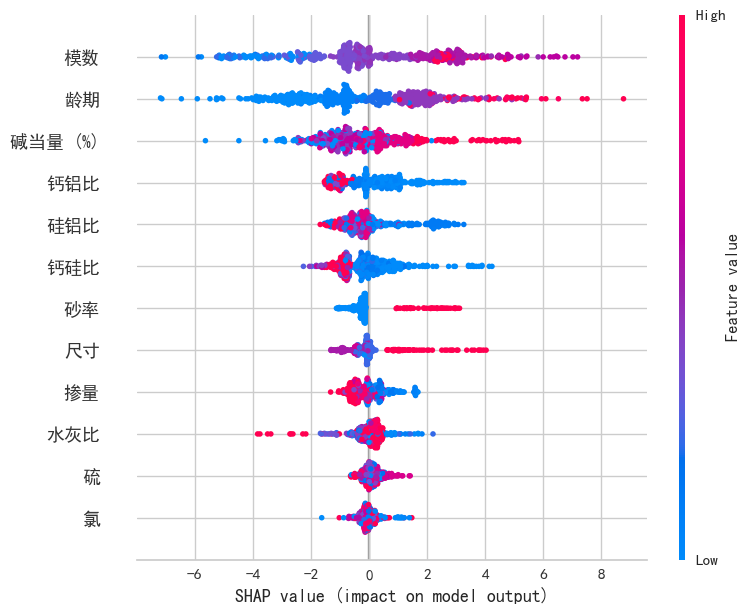

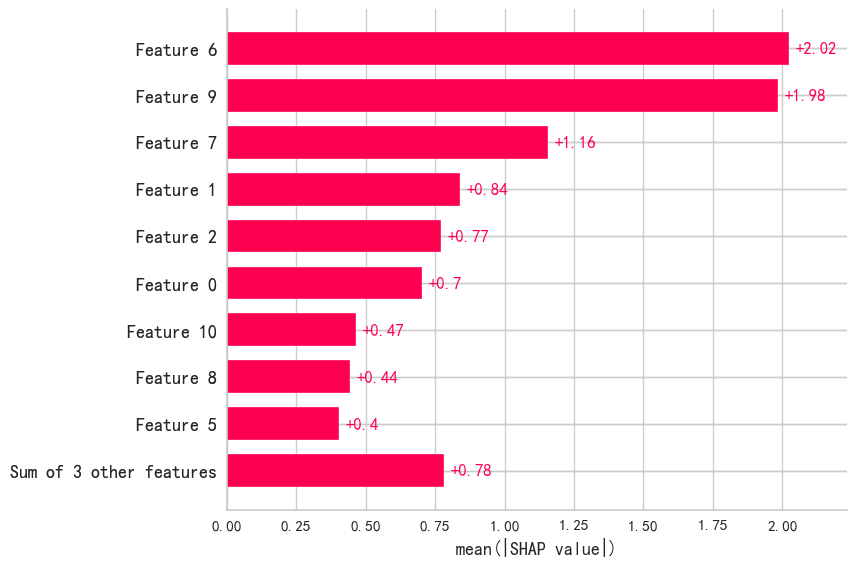

In [24]:
import shap  
catboost_best.fit(x,y)

# 创建SHAP解释器  
explainer = shap.TreeExplainer(catboost_best)  

# 计算SHAP值  
shap_values = explainer.shap_values(x)  

# 将 SHAP 值转换为 Explanation 对象  
shap_values = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=x) 

# 可视化 SHAP 值  
# 1. 蜂群图  
shap.summary_plot(shap_values)  

# 2. 条形图  
shap.plots.bar(shap_values)  